In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import json
import subprocess

from pathlib import Path
from scipy.io import loadmat, savemat

In [3]:
import subprocess

# Define your MATLAB function's arguments
N = 2**7 + 1  # Example value; adjust as needed
dt = 1e-4  # Example value; adjust as needed
T_end = 1  # Example value; adjust as needed
mus = "0.01:0.01:0.1"  # MATLAB array syntax
Mp = 10
K = T_end / dt
DS = 1

In [4]:
import json

datapath = '/data1/jy384/research/Data/UnimodalSROB/Burgers/'
srcpath = '/home/jy384/projects/UnimodalSROB/examples/burgers/'

config = {
    "N": 2**7 + 1,
    "dt": 1e-4,
    "T_end": 1,
    "mus": "0.01:0.01:0.1",
    "Mp": 10,
    "K": 1 / 1e-4,  # T_end / dt
    "DS": 1,
    "params": {
        "modelform": "LQIPC",
        "modeltime": "continuous",
        "dt": 1e-4,
        "ddt_order": "2imp",
        "p": 0, # polynomial order
        "lambda1": 0.1,
        "lambda2": 0.1,
        "lambda3": 0.1,
    }
}

with open(Path(srcpath) / 'config.json', 'w') as f:
    json.dump(config, f)


In [4]:
# Proper command to call your MATLAB function
matlab_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers'); "
    f"runburgers({N}, {dt}, {T_end}, [{mus}], {Mp}, {DS}); exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_cmd, shell=True, check=True)

MATLAB is selecting SOFTWARE OPENGL rendering.
Running Burgers equation data generation
Parameters:
N = 129
dt = 0.0001
T_end = 1
mus = 0.01        0.02        0.03        0.04        0.05        0.06        0.07        0.08        0.09         0.1
Mp = 10
DS = 1
mu = 0.01
mu = 0.02
mu = 0.03
mu = 0.04
mu = 0.05
mu = 0.06
mu = 0.07
mu = 0.08
mu = 0.09
mu = 0.1
       99980          10



CompletedProcess(args='matlab -batch "addpath(\'/home/jy384/projects/UnimodalSROB/examples/burgers/burgers-helpers\'); runburgers(129, 0.0001, 1, [0.01:0.01:0.1], 10, 1); exit;"', returncode=0)

In [9]:
# convert mus to array of mus
mus = np.array([float(m) for m in mus.split(':')])
mus = np.arange(mus[0], mus[-1] + mus[1], mus[1])

# round mus to 2 decimal places
mus = np.round(mus, 2)

In [10]:
# check and load data
mu_start = mus[0]
mu_end = mus[-1]
mu_step = mus[1] - mus[0]

trajectories_path = Path(datapath) / 'trajectories'
snapshots_path = Path(datapath) / 'snapshots'
snapshotsDerivatives_path = Path(datapath) / 'snapshotsDerivatives'

# Find the files 
U_all_files = list(Path(datapath).rglob(f'U_all_mu_*'))
X_all_files = list(Path(datapath).rglob(f'X_all_mu_*'))
R_all_files = list(Path(datapath).rglob(f'R_all_mu_*'))

# Load the data with the mu_start, mu_end, and mu_step in their names
if U_all_files:
    for file in U_all_files:
        if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
            print(file)
            U_all = loadmat(file)['U_all']
if X_all_files:
    for file in X_all_files:
        if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
            print(file)
            X_all = loadmat(file)['X_all']
if R_all_files:
    for file in R_all_files:
        if str(mu_start) in file.name and str(mu_end) in file.name and str(mu_step) in file.name:
            print(file)
            R_all = loadmat(file)['R_all']

/data1/jy384/research/Data/UnimodalSROB/Burgers/trajectories/U_all_mu_0.01_0.01_0.1.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshots/X_all_mu_0.01_0.01_0.1.mat
/data1/jy384/research/Data/UnimodalSROB/Burgers/snapshotsDerivatives/R_all_mu_0.01_0.01_0.1.mat


In [11]:
# Convert cell arrays to numpy arrays for X_all and R_all
X_all = np.array([X_all[0][i] for i in range(X_all.shape[1])])
R_all = np.array([R_all[0][i] for i in range(R_all.shape[1])])

print(U_all.shape, X_all.shape, R_all.shape)

(99980, 10) (10, 129, 99980) (10, 129, 99980)


# SVD of X to get ROB 

In [8]:
mus = np.linspace(0.01, 0.1, 10)

S =  [864.02554133 232.10969286 104.23159019  66.75624163  39.23824345]
idx =  9
rel_err_SVD[idx] =  8.774344327777683e-07
S =  [897.81634411 212.73874802  88.45178255  58.30347723  28.06645503]
idx =  8
rel_err_SVD[idx] =  8.77936502496901e-07
S =  [930.63952173 207.58331872  83.22642885  54.50909567  24.28871264]
idx =  8
rel_err_SVD[idx] =  5.937145172163483e-07
S =  [953.45239294 199.12069016  79.54274017  50.77702394  21.77034447]
idx =  8
rel_err_SVD[idx] =  4.7134824898709127e-07
S =  [978.04023859 192.93416073  77.17480359  47.59563193  20.0827492 ]
idx =  8
rel_err_SVD[idx] =  3.8158886728201225e-07
S =  [995.96891594 186.11096461  75.62757891  44.68104865  19.1467172 ]
idx =  8
rel_err_SVD[idx] =  3.370014839410018e-07
S =  [1008.611154    178.13971756   74.03128853   42.05484446   18.16639644]
idx =  8
rel_err_SVD[idx] =  2.8423569442548313e-07
S =  [1018.36664351  172.72397774   72.98196138   39.93547659   17.78126351]
idx =  8
rel_err_SVD[idx] =  2.591064899304385e-07
S = 

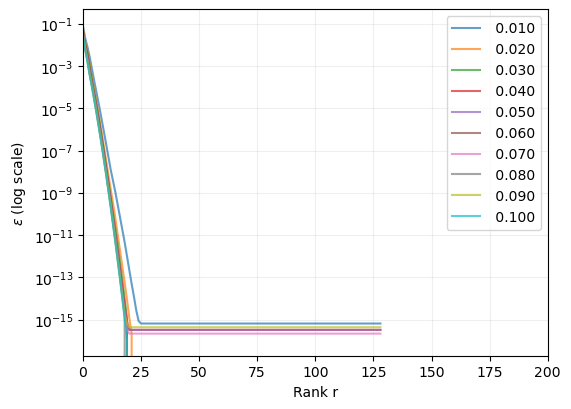

In [9]:
rob_lst = []
rel_err_SVD_lst = []
idx_lst = []
names = [f'{mu: .3f}' for mu in mus]

fig, ax = plt.subplots(figsize=(6, 4.5))


for i in range(len(mus)):
    # svd
    U, S, V = np.linalg.svd(X_all[i, :, :], full_matrices=False)
    print("S = ", S[:5])
    eigvals_SVD = S**2 * (1 / (K*Mp-1))
    # print("eigvals_SVD = \n", eigvals_SVD[:5])
    # append U
    # print("U = ", U.shape)
    rob_lst.append(U)
    
    # calculate the relative error
    rel_err_SVD = 1 - (np.cumsum(eigvals_SVD) / np.sum(eigvals_SVD))
    rel_err_SVD_lst.append(rel_err_SVD)
    # print("rel_err_SVD = \n", rel_err_SVD[:4])

    # print the first idx when it is less than 1e-4
    idx = np.where(rel_err_SVD <= 1e-6)[0][0]
    idx_lst.append(idx)
    print("idx = ", idx)
    print("rel_err_SVD[idx] = ", rel_err_SVD[idx])
    
    ax.plot(rel_err_SVD_lst[i], label=names[i], linestyle='-', alpha=0.7)
    ax.set_yscale('log')
    ax.set_ylabel("$\epsilon$ (log scale)")
    # set limit
    ax.set_xlim([0, 200])
    # ax.set_ylim([1e-13, 1e-3])
    # show grid
    ax.grid(True, alpha=0.2)
    ax.set_xlabel("Rank r")
    ax.legend()

In [10]:
proj_error_lst = []

for r in range(20):
    proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - rob_lst[i][:, :r] @ rob_lst[i][:, :r].T @ X_all[i, :, :], ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    # proj_error = (1/len(mus)) * np.sum([(np.linalg.norm(X_all[i, :, :] - X_all[i, :, :].T @ rob_lst[i][:, r] @ rob_lst[i][:, r].T, ord='fro')**2)/np.linalg.norm(X_all[i, :, :], ord='fro')**2 for i in range(len(mus))])
    print("proj_error = ", proj_error)
    proj_error_lst.append(proj_error)
        

proj_error =  1.0
proj_error =  0.04837112862164597
proj_error =  0.010054297619543281
proj_error =  0.0032975016719826535
proj_error =  0.0007822599092036195
proj_error =  0.00019851534907637712
proj_error =  5.085334285681299e-05
proj_error =  1.2849290487230146e-05
proj_error =  3.104567040206523e-06
proj_error =  7.164534049088518e-07
proj_error =  1.589282091839881e-07
proj_error =  3.4207563885790866e-08
proj_error =  7.3821213526732444e-09
proj_error =  1.6888389907776738e-09
proj_error =  4.4344453198542164e-10
proj_error =  1.2264499731989676e-10
proj_error =  2.973749400038481e-11
proj_error =  7.0149539579097954e-12
proj_error =  1.8558045148386145e-12
proj_error =  4.767348817120222e-13


idx =  9


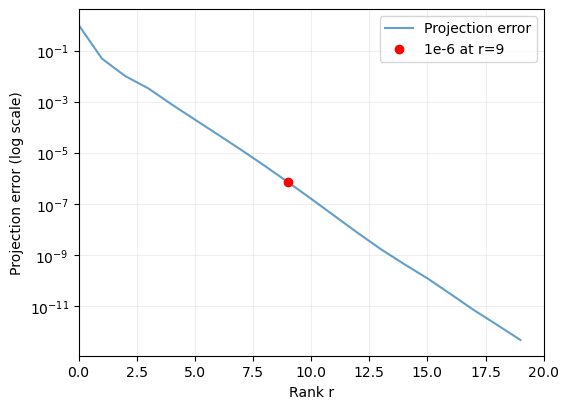

In [11]:
# plot the projection error
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(proj_error_lst, label="Projection error", linestyle='-', alpha=0.7)

# plot the first idx when it is less than 1e-5
idx = np.where(np.array(proj_error_lst) < 1e-6)[0][0]
print("idx = ", idx)
ax.plot(idx, proj_error_lst[idx], 'ro', label=f"1e-6 at r={idx}")

ax.set_yscale('log')
ax.set_ylabel("Projection error (log scale)")
# set limit
ax.set_xlim([0, 20])
# ax.set_ylim([1e-13, 1e-3])
# show grid
ax.grid(True, alpha=0.2)
ax.set_xlabel("Rank r")
ax.legend()
plt.show()

# Define truncation order r

In [6]:
# r = np.max(idx_lst)
r = 15
print("r = ", r)

print("Shape of the robs = ", np.array(rob_lst).shape)

r =  15


NameError: name 'rob_lst' is not defined

# Get the ROBs and save them for matlab OpInf routine

In [19]:
# rob_lst = np.array(rob_lst)
# print("rob_lst = ", rob_lst.shape)

# truncation of the ROBs
# rob_lst = rob_lst[:, :, :r]
# print("truncated rob_lst = ", rob_lst.shape)

# # make it a suitable shape for matlab routine, where ROBs are stored in the third dimension
# rob_lst = np.moveaxis(rob_lst, 0, 2)
# print("rob_lst = ", rob_lst.shape)

rob_arr = []

for i in range(len(mus)):
    rob_arr.append(rob_lst[i][:, :r])
    
rob_arr = np.array(rob_arr)
print("rob_arr = ", rob_arr.shape)

rob_arr = np.transpose(rob_arr, (1, 2, 0))
print("rob_arr = ", rob_arr.shape)
    

rob_arr =  (10, 129, 15)
rob_arr =  (129, 15, 10)


In [30]:
# save the ROBs as Vr_all.mat at datapath
# savemat(f'{datapath}/Vr_all.mat', {'Vr_all': rob_lst})
ROBs_path = Path(datapath) / 'ROBs'
savemat(f'{ROBs_path}/Vr_all_mu_{mu_start}_{mu_step}_{mu_end}.mat', {'Vr_all': rob_arr})

# Matlab routine for OpInf

In [7]:
# params.modelform = 'LQI';           % model is linear-quadratic with input term
# params.modeltime = 'continuous';    % learn time-continuous model
# params.dt        = dt;              % timestep to compute state time deriv
# params.ddt_order = '1ex';           % explicit 1st order timestep scheme

# % Inputs:
# %   - params: parameters for the operator inference, including:
# %       - modelform: model form of the operator
# %       - modeltime: model time of the operator
# %       - dt: timestep to compute state time derivative
# %       - ddt_order: explicit 1st order timestep scheme
# %   - mus: parameter values
# %   - r: POD basis order
# %   - X_all: state data
# %   - R_all: RHS data (residual)
# %   - U_all: input data
# %   - Vr_all: truncated POD basis


# update config file with truncation order r
config['robparams'] = {
    "r": int(r)
}

with open(Path(srcpath) / 'config.json', 'w') as f:
    json.dump(config, f)



matlab_opinf_cmd = (
    f"matlab -batch \"addpath('/home/jy384/projects/UnimodalSROB/examples/burgers/'); "
    f"run_burgersOpInf; exit;\""
)

# Use subprocess to call MATLAB
subprocess.run(matlab_opinf_cmd, shell=True, check=True)

In [12]:
# Read s_ref_all.mat and s_rec_all.mat
reconstructedState_path = Path(datapath) / 'reconstructedState'
referenceState_path = Path(datapath) / 'referenceState'
s_ref_all = loadmat(f'{referenceState_path}/s_ref_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_ref_all']
s_rec_all = loadmat(f'{reconstructedState_path}/s_rec_all_mu_{mu_start}_{mu_step}_{mu_end}.mat')['s_rec_all']

# extract the tensors from the cell arrays
s_ref_all = np.array([s_ref_all[i][0] for i in range(s_ref_all.shape[0])])
s_rec_all = np.array([s_rec_all[i][0] for i in range(s_rec_all.shape[0])])

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


/tmp/ipykernel_380136/653882445.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


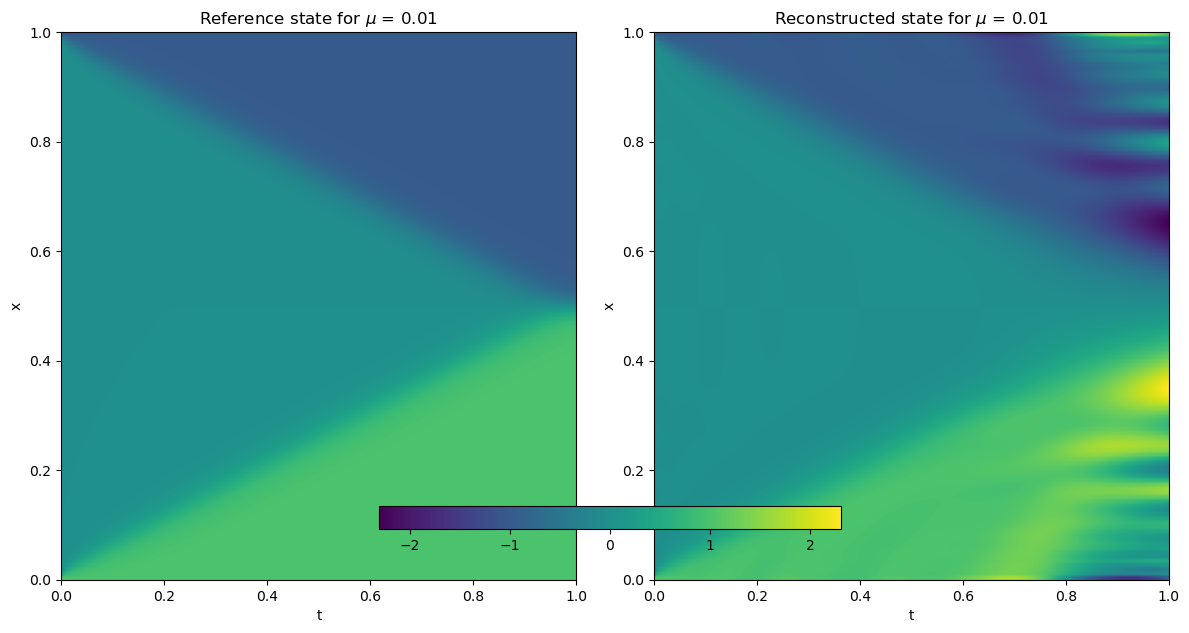

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


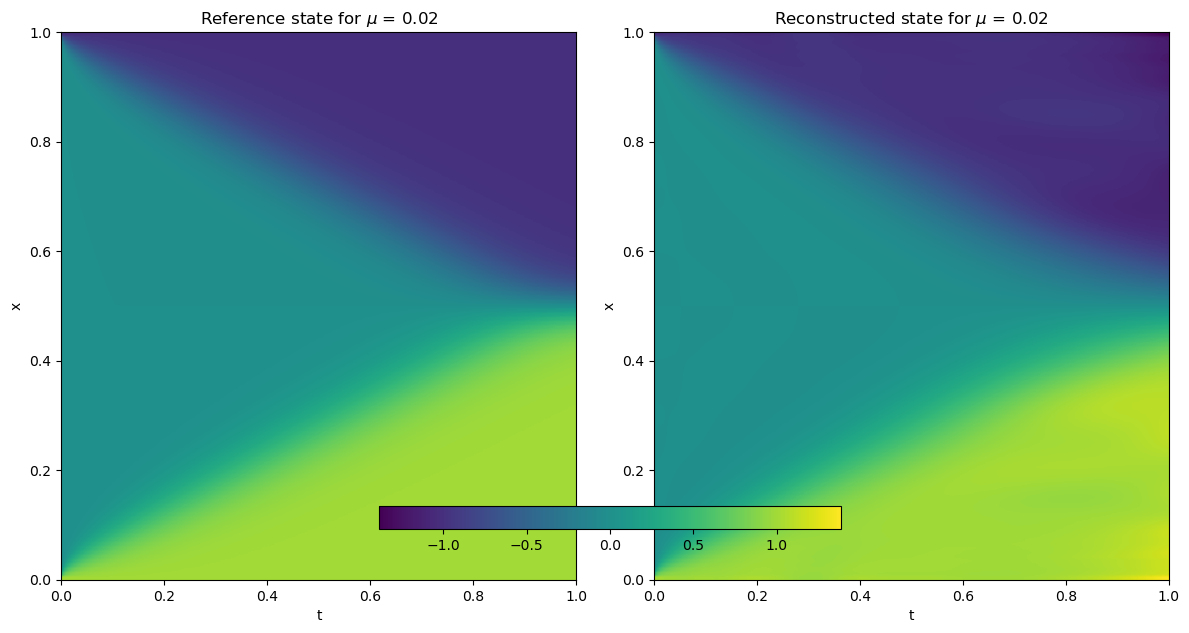

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


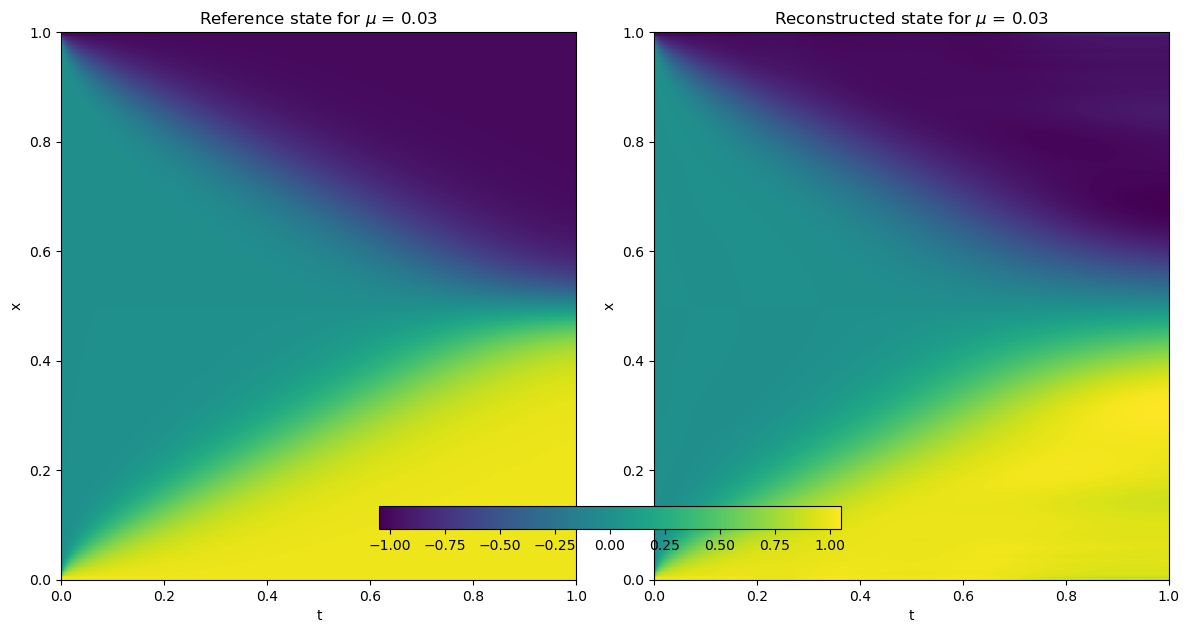

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


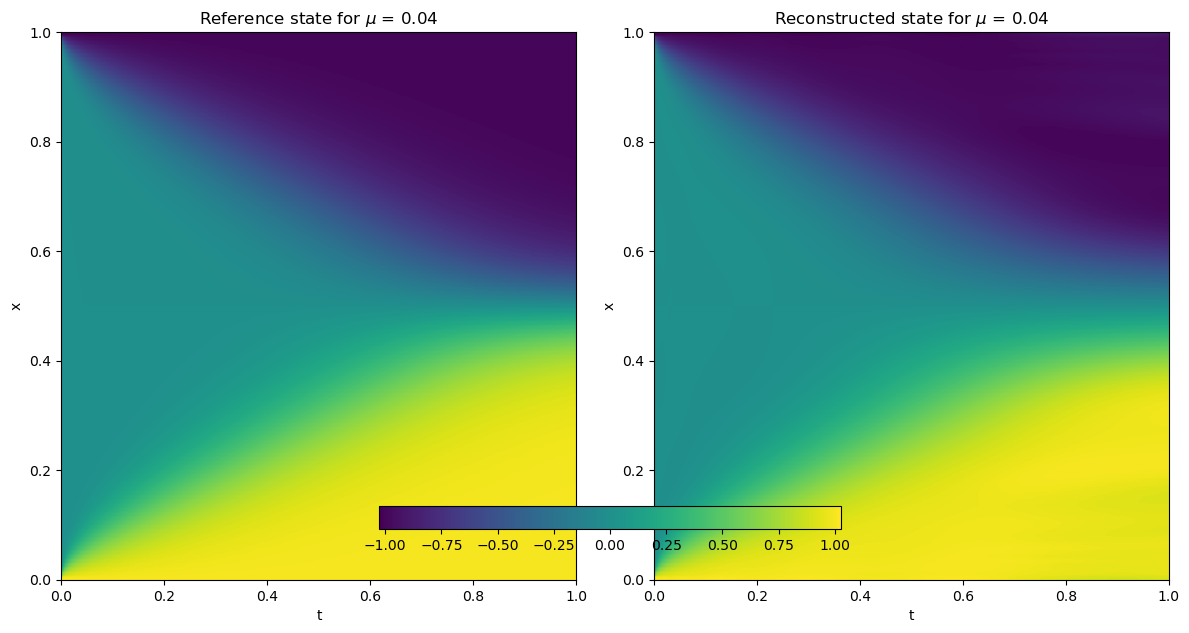

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


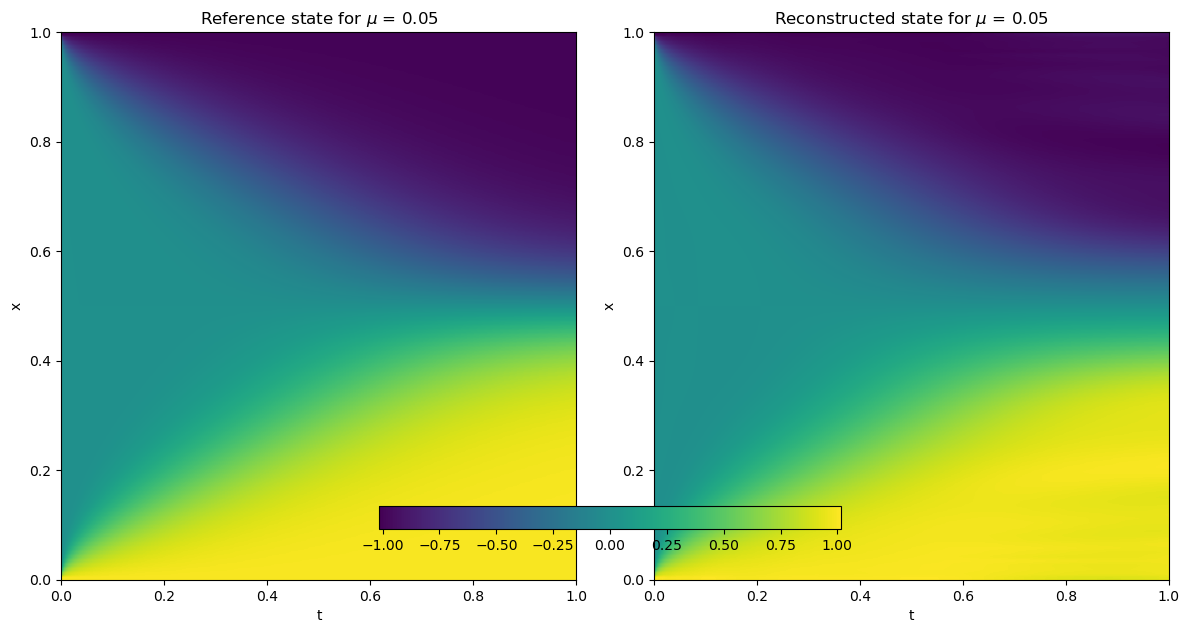

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


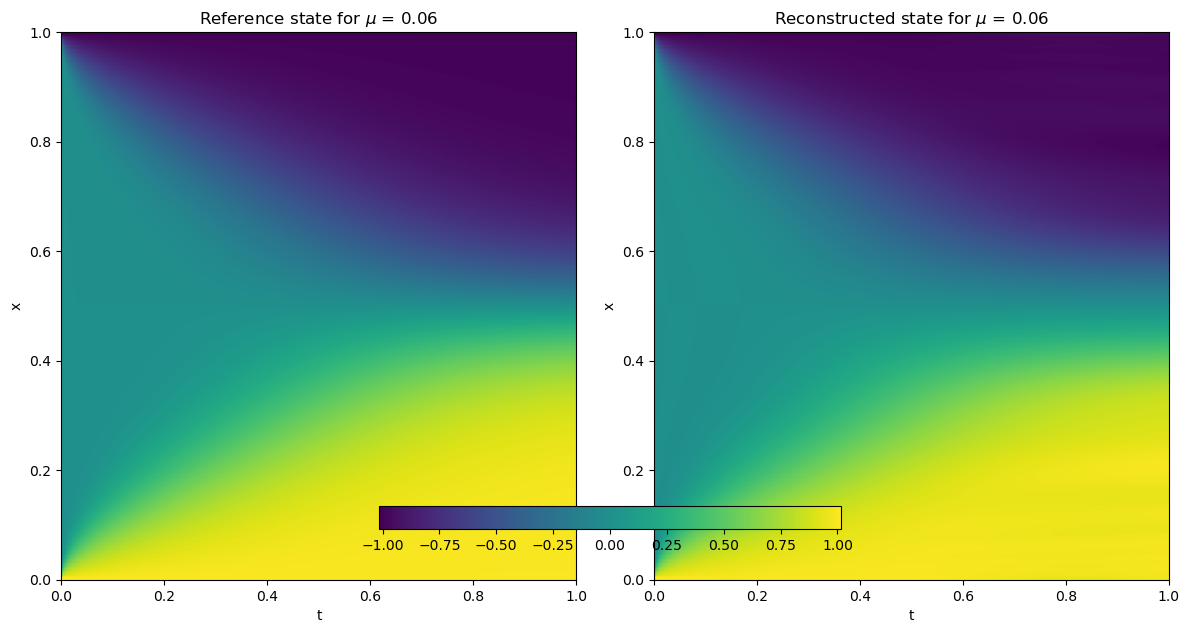

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


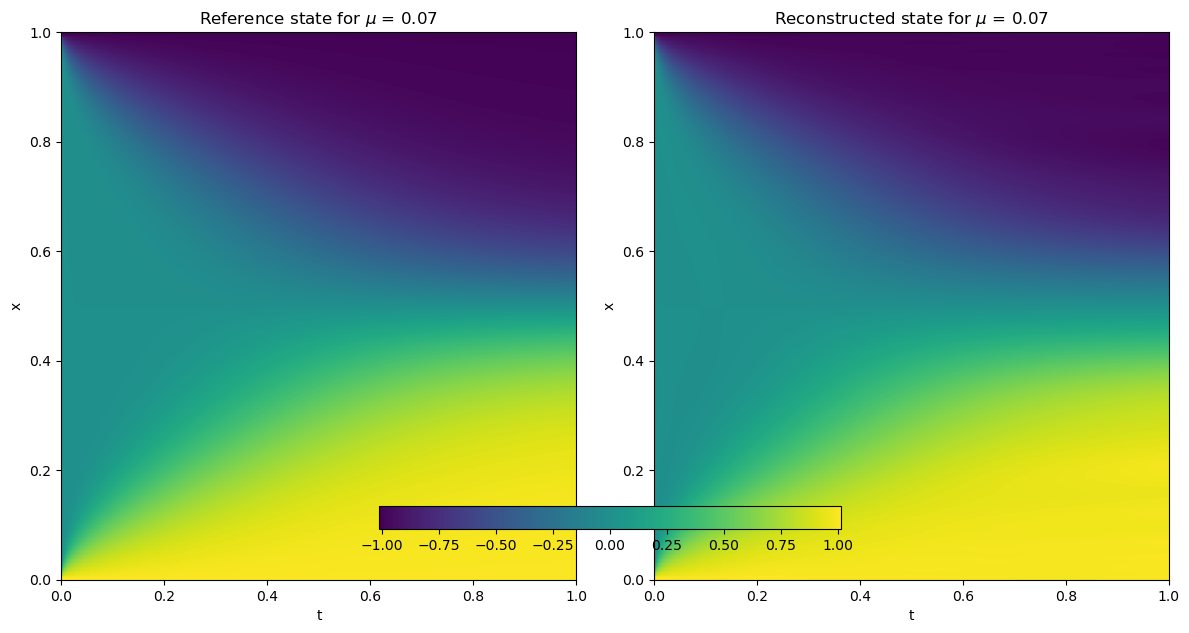

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


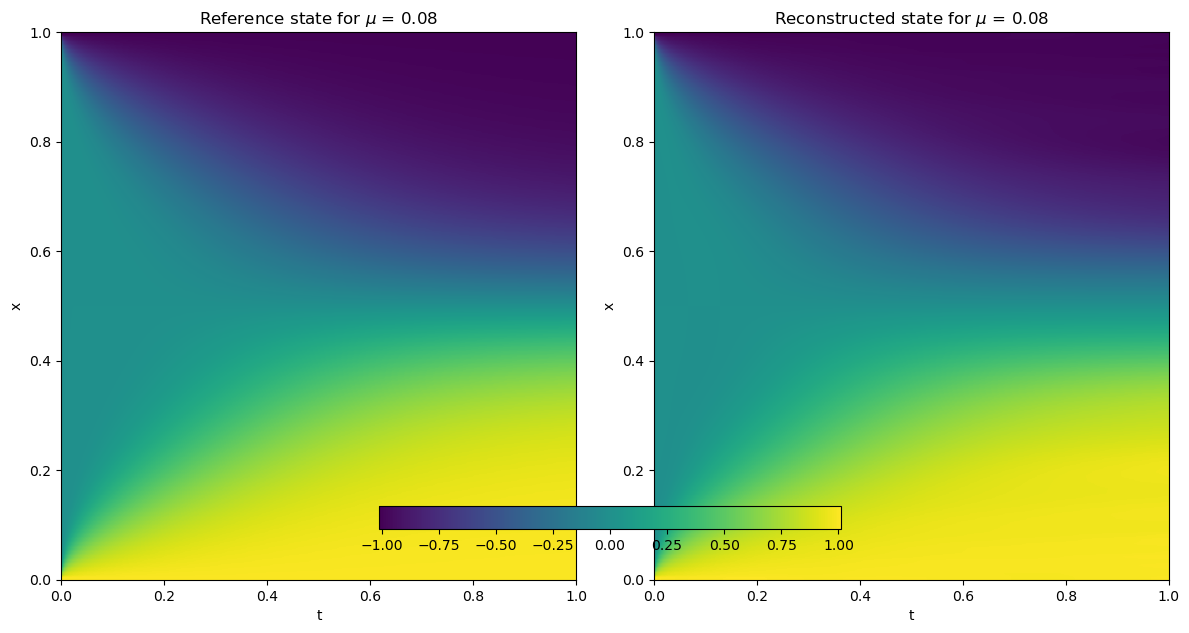

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


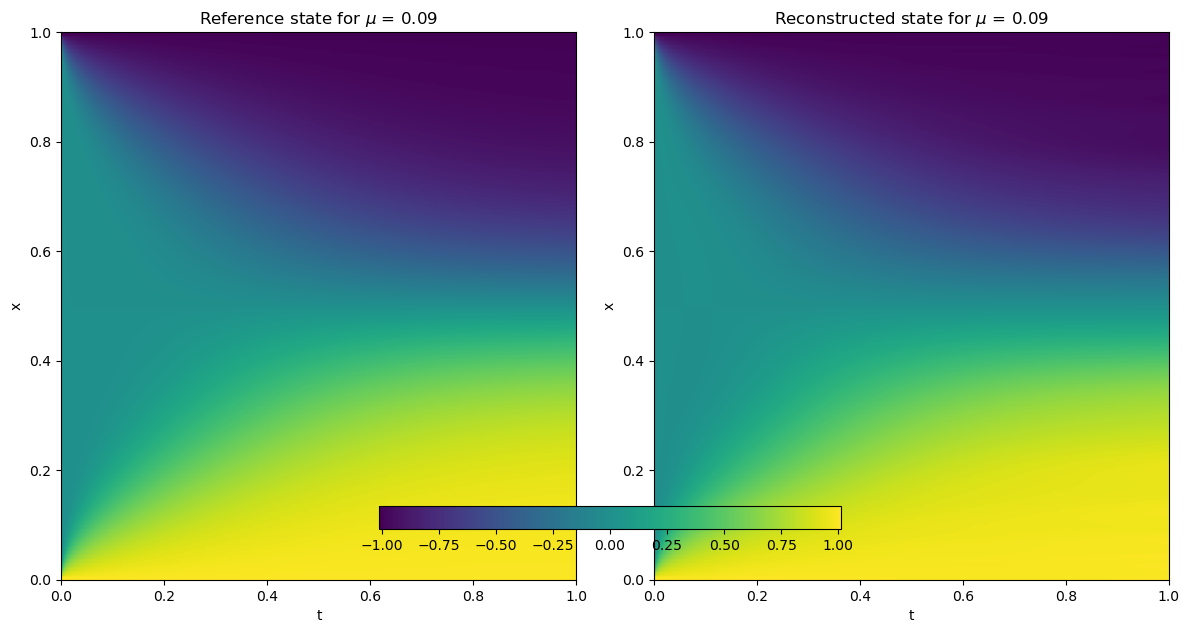

X =  (129, 10001)
Y =  (129, 10001)
s_ref_all[i] =  (129, 10001)


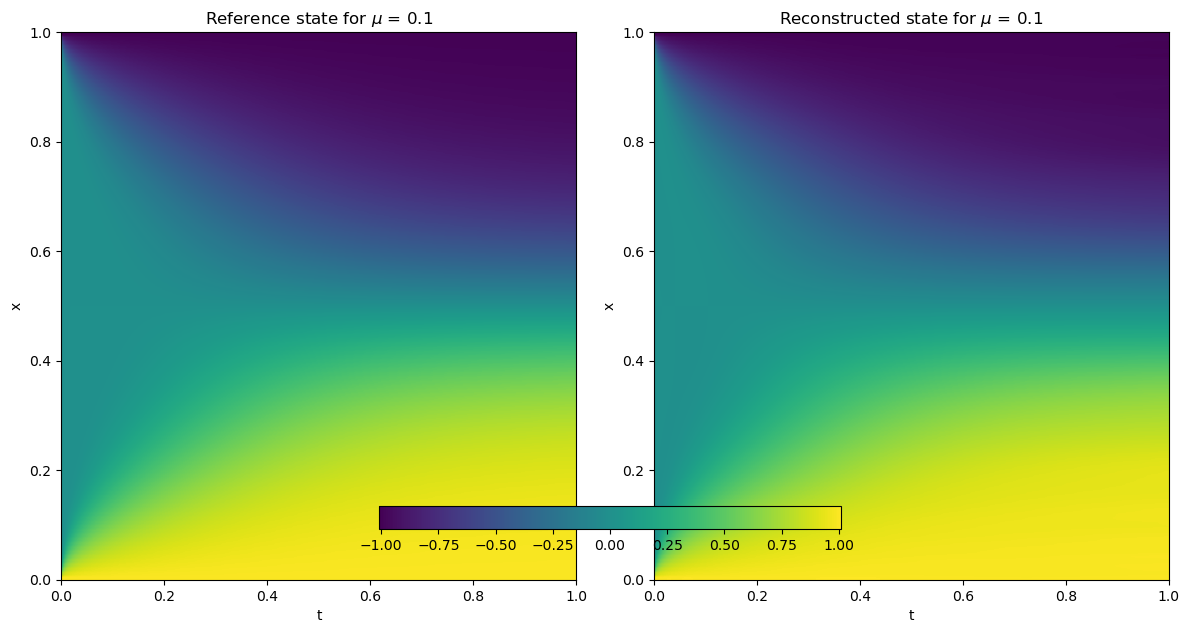

In [25]:
# plot the results side by side
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming s_ref_all is a list of 2D numpy arrays
for i in range(Mp):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    X, Y = np.meshgrid(np.linspace(0.0, T_end, int(K+1)), np.linspace(0.0, 1.0, N))
    print("X = ", X.shape)
    print("Y = ", Y.shape)
    print("s_ref_all[i] = ", s_ref_all[i].shape)
    # s = ax.plot_surface(X, Y, s_ref_all[i].reshape(N, int(K+1)), cmap='viridis')
    c1 = axs[0].imshow(s_ref_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    # plot the trajectory of x coordinate across time, x-axis is time, y-axis is x
    # axs[0].scatter(np.linspace(0.0, T_end, U_all.shape[0]), U_all[:, i], color='red', s=1)
    # fig.colorbar(c)
    axs[0].set_xlabel('t')
    axs[0].set_ylabel('x')
    axs[0].set_title(f'Reference state for $\mu$ = {mus[i]}')
    
    c2 = axs[1].imshow(s_rec_all[i].reshape(N, int(K+1)), extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
    
    # fig.colorbar(c)
    axs[1].set_xlabel('t')
    axs[1].set_ylabel('x')
    axs[1].set_title(f'Reconstructed state for $\mu$ = {mus[i]}')  
    
    # use same colorbar for both plots, the range is determined by the maximum and minimum values of the two plots
    vmin = np.min([np.min(s_ref_all[i]), np.min(s_rec_all[i])])
    vmax = np.max([np.max(s_ref_all[i]), np.max(s_rec_all[i])])
    c1.set_clim(vmin=vmin, vmax=vmax)
    c2.set_clim(vmin=vmin, vmax=vmax)
    
    fig.colorbar(c1, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05)
    plt.tight_layout()
    
    
    plt.show()

In [28]:
# calculate characteristic velocity of the system
np.mean(np.abs(R_all[0]))

36.71646165619607